In [1]:
###General Code First Box
import pandas as pd
import numpy as np
import scanpy as sc
import magpy as mp
import scipy.stats as stats
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

def sort_list_by_pctexp(adata, gene_list, groupby='lineage'):
    subset = adata[:,gene_list]
    clusters = subset.obs[groupby].unique()
    pctexp = np.zeros((len(clusters),subset.shape[1]))
    for i,cluster in enumerate(clusters):
        subset2 = subset[subset.obs[groupby]==cluster]
        pctexp[i] = (subset2.layers['raw_normalized']>0).sum(axis=0).A1 / subset.shape[0]
    subset.var['pctmax'] = pctexp.max(axis=0)
    sorted_list = subset.var['pctmax'].sort_values(ascending=False).index.tolist()
    return sorted_list
def sort_list_by_mean(adata, gene_list, groupby='lineage'):
    subset = adata[:,gene_list]
    clusters = subset.obs[groupby].unique()
    cmeans = np.zeros((len(clusters),subset.shape[1]))
    for i,cluster in enumerate(clusters):
        subset2 = subset[subset.obs[groupby]==cluster]
        cmeans[i] = subset2.layers['raw_normalized'].mean(axis=0).A1
    subset.var['cmeans'] = cmeans.max(axis=0)
    sorted_list = subset.var['cmeans'].sort_values(ascending=False).index.tolist()
    return sorted_list
def means_to_df(adata, gene_list, save=None, groupby='lineage'):
    subset = adata[:,gene_list]
    clusters = subset.obs[groupby].unique()
    cmeans = {}
    for i,cluster in enumerate(clusters):
        subset2 = subset[subset.obs[groupby]==cluster]
        cmeans[cluster] = subset2.layers['raw_normalized'].mean(axis=0).A1
    df = pd.DataFrame(cmeans,index=gene_list)
    if save: df.to_csv(save)
    return df

combined_path = "/proj/magness/CDS010-014-015_combined"

# sc.set_figure_params(dpi_save = 300, format = 'svg')
fig_path = combined_path+'fig7_Paneths/'
sc.settings.figdir = fig_path

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad


Trying to set attribute `.uns` of view, copying.


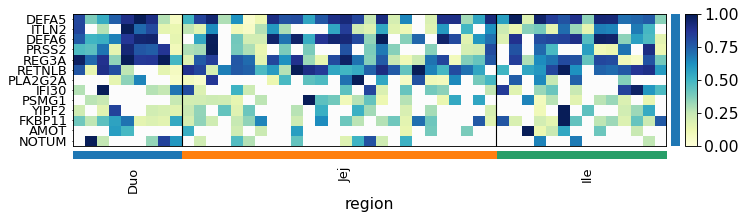

In [2]:
##Figure 7A
### PC DEG heatmap only across SI

adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")

Gene_dict = {
    'Paneth':['DEFA5',	'ITLN2',	'DEFA6',	'PRSS2',	'REG3A',	'RETNLB',	'PLA2G2A',	'IFI30',	'PSMG1',	'YIPF2',	'FKBP11','AMOT',	'NOTUM'
]}
subset = adata[adata.obs['lineage'].isin(['SI_paneth'])]

sc.pl.heatmap(subset, Gene_dict, groupby = 'region', swap_axes = True, show_gene_labels = True, standard_scale='var',cmap=mp.blues)#,save='PC_UMAP')

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad

The following genes were filtered out:
[]



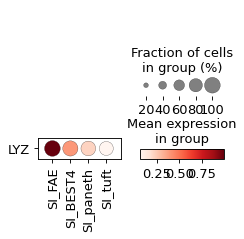

In [3]:
###Figure 7B
###LYZ not proper marker for human Paneth Cells
adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")


adata.obs.lineage = adata.obs.lineage.cat.reorder_categories(['SI_FAE','SI_BEST4','SI_paneth','SI_tuft','SI_ISC','SI_TA','SI_TA2','SI_earlyAE','SI_intermAE','SI_matureAE','SI_AE2','SI_secretory_prog','SI_goblet','SI_EEC','C_ISC','C_TA', 'C_earlyACC','C_lateACC', 'C_tuft','C_secretory_prog','C_goblet','C_EEC','C_BEST4'])

subset = adata[adata.obs['lineage'].isin(['SI_paneth','SI_BEST4','SI_FAE','SI_tuft'])]


gene_list = mp.filter_genes(subset, ['LYZ'])
subset = mp.scale_adata(subset, groupby = 'lineage')

sc.pl.dotplot(subset, var_names=gene_list, groupby = 'lineage', swap_axes=True, layer='raw_scaled')#,save='PC_Lyz')

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad



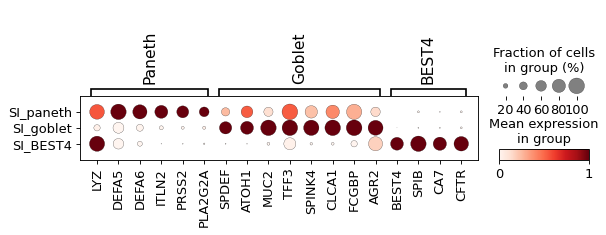

In [4]:
###Figure 7C
###Paneth Cells Distinct from Goblet or BEST4
adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")
subset = adata[adata.obs['lineage'].isin(['SI_paneth','SI_BEST4','SI_goblet'])]


Gene_dict = {
    'Paneth':['LYZ','DEFA5','DEFA6','ITLN2','PRSS2','PLA2G2A'],
    'Goblet':['SPDEF','ATOH1','MUC2','TFF3','SPINK4','CLCA1','FCGBP','AGR2'],
    'BEST4':['BEST4','SPIB','CA7','CFTR']
}
subset = mp.scale_adata(subset, groupby = 'lineage')

sc.pl.dotplot(subset, var_names=Gene_dict, groupby = 'lineage', swap_axes=False, layer='raw_scaled')#,save='PCnotBEST4')


Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad

The following genes were filtered out:
['CSF2', 'RSPO1']



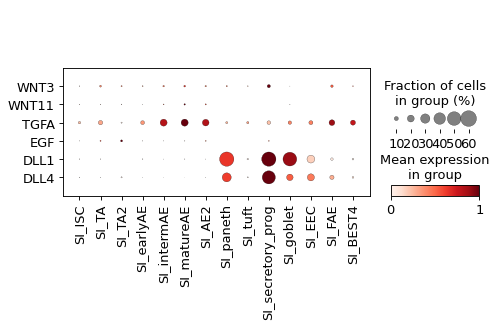

In [5]:
###Figure 7D
###Expected Paneth Cell niche factors from mouse papers
adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")
subset = adata[adata.obs['organ']=='SI',:]
Gene_list = mp.filter_genes(subset, [
    
'WNT3','WNT11','TGFA','EGF','DLL1','DLL4','CSF2','RSPO1'
])
subset = mp.scale_adata(subset, groupby = 'lineage')

sc.pl.dotplot(subset, var_names=Gene_list, groupby = 'lineage', swap_axes=True, layer='raw_scaled')#,save='PC_expected_niche')


Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad



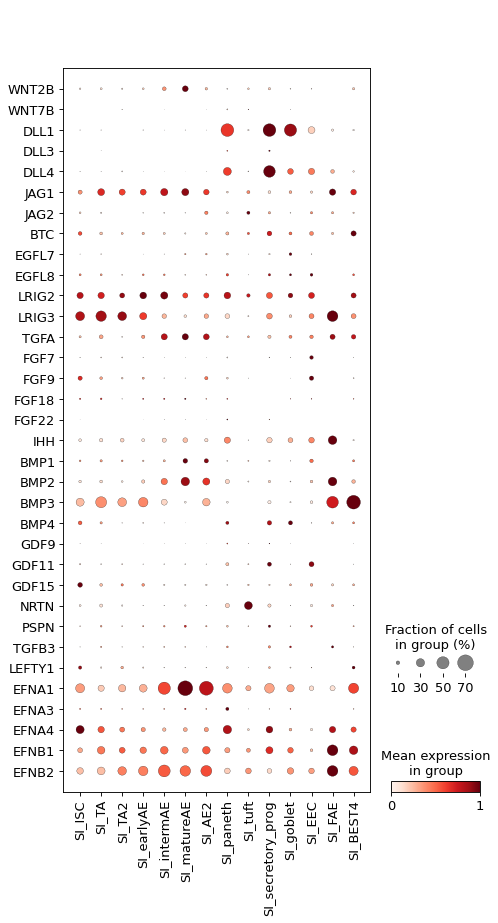

In [6]:
###Supp Fig 7E
###Few GFs expresed highest in PCs 
adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")
adata.obs.lineage = adata.obs.lineage.cat.reorder_categories(['SI_ISC','SI_TA','SI_TA2','SI_earlyAE','SI_intermAE','SI_matureAE','SI_AE2','SI_paneth', 'SI_tuft','SI_secretory_prog','SI_goblet','SI_EEC', 'SI_FAE', 'SI_BEST4','C_ISC','C_TA', 'C_earlyACC','C_lateACC', 'C_tuft','C_secretory_prog','C_goblet','C_EEC','C_BEST4'])
subset = adata[adata.obs['organ']=='SI',:]

gene_list = (['WNT2B','WNT7B','DLL1','DLL3','DLL4','JAG1','JAG2','BTC','EGFL7','EGFL8','LRIG2','LRIG3','TGFA','FGF7','FGF9','FGF18','FGF22','IHH','BMP1','BMP2','BMP3','BMP4','GDF9','GDF11','GDF15','NRTN','PSPN','TGFB3','LEFTY1','EFNA1','EFNA3','EFNA4','EFNB1','EFNB2'])
subset = mp.scale_adata(subset, groupby = 'lineage')

sc.pl.dotplot(subset, var_names=gene_list, groupby = 'lineage', swap_axes=True, layer='raw_scaled')#,save='PC_no_GFs')



Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad



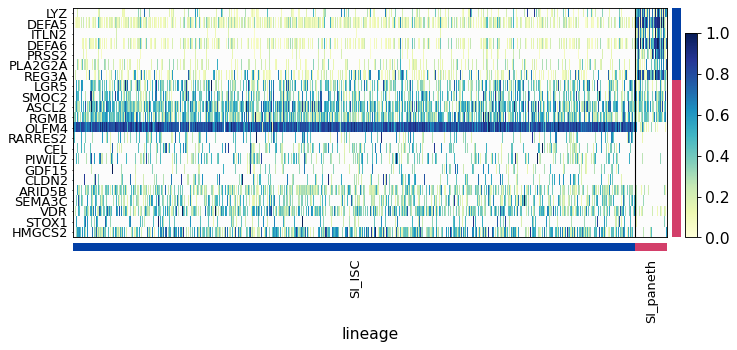

In [7]:
###Figure 7F
### ISC genes in PCs
adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")
Gene_dict = {
    'Paneth':['LYZ','DEFA5',	'ITLN2',	'DEFA6',	'PRSS2',	'PLA2G2A',	'REG3A'],
    'Shared':['LGR5','SMOC2','ASCL2','RGMB'],
    'ISC':['OLFM4',	'RARRES2',	'CEL',	'PIWIL2',	'GDF15',	'CLDN2',	'ARID5B',	'SEMA3C',	'VDR',	'STOX1',	'HMGCS2']
}
subset = adata[adata.obs['lineage'].isin(['SI_ISC','SI_paneth'])]

subset = mp.scale_adata(subset, groupby = 'lineage')

sc.pl.heatmap(subset, Gene_dict, groupby = 'lineage', swap_axes = True, show_gene_labels = True,standard_scale='var',cmap=mp.blues)#,save='PC_ISC_genes-ISConly')

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad

The following genes were filtered out:
[]



Trying to set attribute `.var` of view, copying.


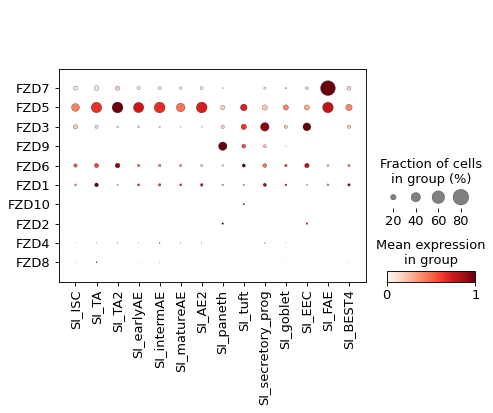

In [8]:
###Figure 7H
####Paneth cell FZD9
adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")

subset = adata[adata.obs['organ']=='SI',:]

gene_list = mp.filter_genes(subset, [
'FZD1','FZD2','FZD3','FZD4','FZD5','FZD6','FZD7','FZD8','FZD9','FZD10'
])
gene_list = sort_list_by_mean(subset, gene_list, groupby='lineage')
subset = mp.scale_adata(subset, groupby = 'lineage')

sc.pl.dotplot(subset, var_names=gene_list, groupby = 'lineage', swap_axes=True, layer='raw_scaled')#,save='PC_FZDs')


Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad

The following genes were filtered out:
[]



Trying to set attribute `.var` of view, copying.


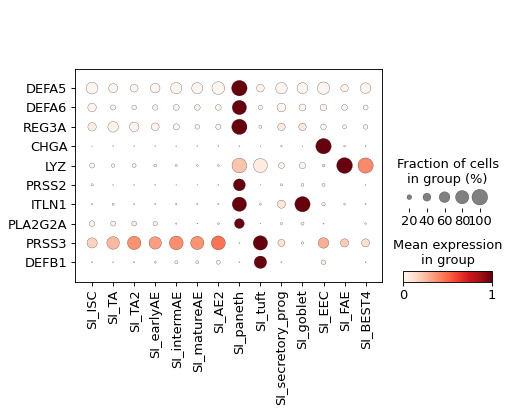

In [8]:
###Figure 7I
####Reactome_antimicrobial_peptides in SI PCs
adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")

subset = adata[adata.obs['organ']=='SI',:]

gene_list = mp.filter_genes(subset, [
'DEFA5','DEFA6','REG3A','CHGA','LYZ','PRSS2','ITLN1','PLA2G2A','PRSS3','DEFB1'
])
gene_list = sort_list_by_mean(subset, gene_list, groupby='lineage')
subset = mp.scale_adata(subset, groupby = 'lineage')

sc.pl.dotplot(subset, var_names=gene_list, groupby = 'lineage', swap_axes=True, layer='raw_scaled')#,save='PC_antimicrob')
